<a href="https://colab.research.google.com/github/GeetikaS7/Machine-Learning/blob/Projects/Alphashots_AI_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A - "Data Extraction":

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Download historical data for EUR/INR from January 1, 2023, to September 30, 2024 & Load data
data = pd.read_csv('/content/EUR_INR Historical Data.csv')

In [ ]:
# Step 3: Preprocess data
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values(by='Date')

# Convert 'Price' column to string type before applying string operations
data['Price'] = data['Price'].astype(str).str.replace(',', '', regex=False)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Open'] = data['Open'].astype(str).str.replace(',', '', regex=False)
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = data['High'].astype(str).str.replace(',', '', regex=False)
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = data['Low'].astype(str).str.replace(',', '', regex=False)
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Change %'] = data['Change %'].str.replace('%', '', regex=False).astype(float)

In [ ]:
# B - "Technical Analysis":

# Step 4: Calculate Indicators:
# Calculate Moving Averages
data['MA_1D'] = data['Price'].rolling(window=1).mean()
data['MA_1W'] = data['Price'].rolling(window=5).mean()

# Calculate Bollinger Bands
data['20_MA'] = data['Price'].rolling(window=20).mean()
data['STD'] = data['Price'].rolling(window=20).std()
data['Upper_Band'] = data['20_MA'] + (2 * data['STD'])
data['Lower_Band'] = data['20_MA'] - (2 * data['STD'])

# Calculate Commodity Channel Index (CCI)
def calculate_cci(df, ndays=20):
    TP = (df['High'] + df['Low'] + df['Price']) / 3
    CCI = (TP - TP.rolling(ndays).mean()) / (0.015 * TP.rolling(ndays).std())
    return CCI

data['CCI'] = calculate_cci(data)


In [ ]:
# Step 5: Decision-making based on indicators
# Define thresholds for buy/sell/neutral decisions
data['MA_Decision'] = np.where(data['MA_1D'] > data['MA_1W'], 'BUY', 'SELL')
data['BB_Decision'] = np.where(data['Price'] > data['Upper_Band'], 'SELL',
                               np.where(data['Price'] < data['Lower_Band'], 'BUY', 'NEUTRAL'))
data['CCI_Decision'] = np.where(data['CCI'] > 100, 'SELL',
                                np.where(data['CCI'] < -100, 'BUY', 'NEUTRAL'))


In [ ]:
#Step 6: Extract last row for final decisions
final_decisions = data[['MA_Decision', 'BB_Decision', 'CCI_Decision']].iloc[-1]
decisions_df = pd.DataFrame({
    'Indicator': ['Moving Average', 'Bollinger Bands', 'CCI'],
    'Decision': final_decisions.values
})

In [ ]:
# Step 7: Plot the graphs
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

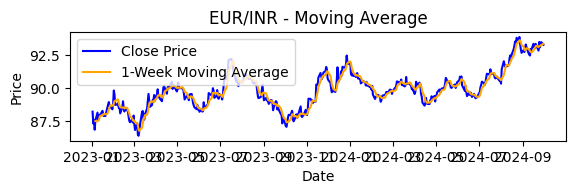

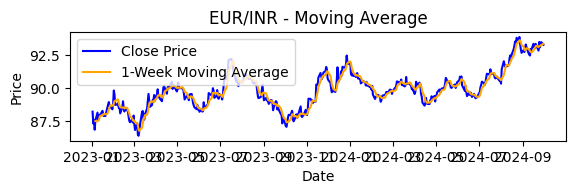

In [ ]:
# Moving Average Plot
plt.subplot(3, 1, 1)
plt.plot(data['Date'], data['Price'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA_1W'], label='1-Week Moving Average', color='orange')
plt.title('EUR/INR - Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


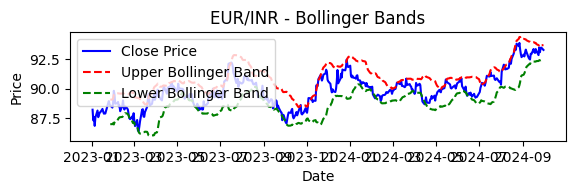

In [ ]:
# Bollinger Bands Plot
plt.subplot(3, 1, 2)
plt.plot(data['Date'], data['Price'], label='Close Price', color='blue')
plt.plot(data['Date'], data['Upper_Band'], label='Upper Bollinger Band', linestyle='--', color='red')
plt.plot(data['Date'], data['Lower_Band'], label='Lower Bollinger Band', linestyle='--', color='green')
plt.title('EUR/INR - Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


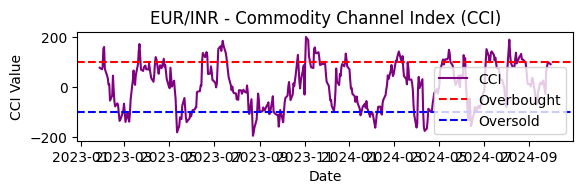

In [ ]:
# CCI Plot
plt.subplot(3, 1, 3)
plt.plot(data['Date'], data['CCI'], label='CCI', color='purple')
plt.axhline(100, color='red', linestyle='--', label='Overbought')
plt.axhline(-100, color='blue', linestyle='--', label='Oversold')
plt.title('EUR/INR - Commodity Channel Index (CCI)')
plt.xlabel('Date')
plt.ylabel('CCI Value')
plt.legend()

In [ ]:
# Show plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# C - "Decision-making to determine BUY, SELL, or NEUTRAL ":

# Step 8: Load data assuming it is preprocessed (Date, Price, MA_Decision, BB_Decision, CCI_Decision)

# Extract last 7 days of signals
signals_table = data[['Date', 'MA_Decision', 'BB_Decision', 'CCI_Decision']].tail(7)
signals_table.columns = ['Date', 'Moving Average 1-Day', 'Bollinger Bands 1-Day', 'CCI 1-Day']

# Add 1-Week summary signals by finding the mode of the last 5 days for each indicator
signals_table['Moving Average 1-Week'] = signals_table['Moving Average 1-Day'].mode()[0]
signals_table['Bollinger Bands 1-Week'] = signals_table['Bollinger Bands 1-Day'].mode()[0]
signals_table['CCI 1-Week'] = signals_table['CCI 1-Day'].mode()[0]

# Display or save the table as CSV
print(signals_table)
signals_table.to_csv('EUR_INR_signals_table.csv', index=False)

        Date Moving Average 1-Day Bollinger Bands 1-Day CCI 1-Day  \
6 2024-09-20                  BUY               NEUTRAL   NEUTRAL   
5 2024-09-23                 SELL               NEUTRAL   NEUTRAL   
4 2024-09-24                  BUY               NEUTRAL   NEUTRAL   
3 2024-09-25                 SELL               NEUTRAL   NEUTRAL   
2 2024-09-26                  BUY               NEUTRAL   NEUTRAL   
1 2024-09-27                  BUY               NEUTRAL   NEUTRAL   
0 2024-09-30                 SELL               NEUTRAL   NEUTRAL   

  Moving Average 1-Week Bollinger Bands 1-Week CCI 1-Week  
6                   BUY                NEUTRAL    NEUTRAL  
5                   BUY                NEUTRAL    NEUTRAL  
4                   BUY                NEUTRAL    NEUTRAL  
3                   BUY                NEUTRAL    NEUTRAL  
2                   BUY                NEUTRAL    NEUTRAL  
1                   BUY                NEUTRAL    NEUTRAL  
0                   BUY    